#Biblioteca

In [100]:
#Manipulação de dados
import pandas as pd


#Visualizção
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [14]:
df = pd.read_csv("KAG_conversion_data.csv")

#Primeira impressão

In [ ]:
type(df)

In [36]:
df.head() #Lista pot default as 5 primeiras listas

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [35]:
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2


In [37]:
df.columns


Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1143, step=1)

In [ ]:
df.shape

(1143, 11)

In [29]:
linhas, colunas = df.shape

In [31]:
print(f"O número de linhas e {linhas}")

O número de linhas e 1143


In [33]:
ser_interest = df["interest"]

In [34]:
type(ser_interest)

pandas.core.series.Series

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


#Dicionário dos dados
* ad_id - ID único para cada anúncio
* xyzcampaignid - ID associado a cada campanha publicitária da empresa XYZ
* fbcampaignid - ID associado a como o Facebook rastreia cada campanha.
* age - idade da pessoa a quem o anúncio é mostrado.
* gender - sexo da pessoa que deseja que o anúncio seja mostrado
* interest - código que especifica a categoria à qual pertence o interesse da * * pessoa (os interesses são mencionados no perfil público da pessoa no Facebook)
* Impression - o número de vezes que o anúncio foi mostrado.
* Clicks - número de cliques nesse anúncio.
* Spent - Valor pago pela empresa xyz ao Facebook, para exibir aquele anúncio.
* Total conversion - Número total de pessoas que fizeram perguntas sobre o produto depois de ver o anúncio.
Approved c

In [52]:
df.rename(columns = {'ad_id': 'id_anuncio', 'xyz_campaign_id': 'id_campanha', 'fb_campaign_id': 'id_fb_campanha',
                     'age': 'idade', 'gender': 'genero', 'interest': 'interesse', 'Impressions': 'numero_exibicoes',
                     'Clicks': 'cliques_no_anuncio', 'Spent': 'valor_pago_anuncio', 'Total_Conversion': 'conversao',
                     'Approved_Conversion': 'compras'}, inplace = True)


In [24]:
df.columns


Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

In [41]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [53]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [23]:
df.isnull()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False


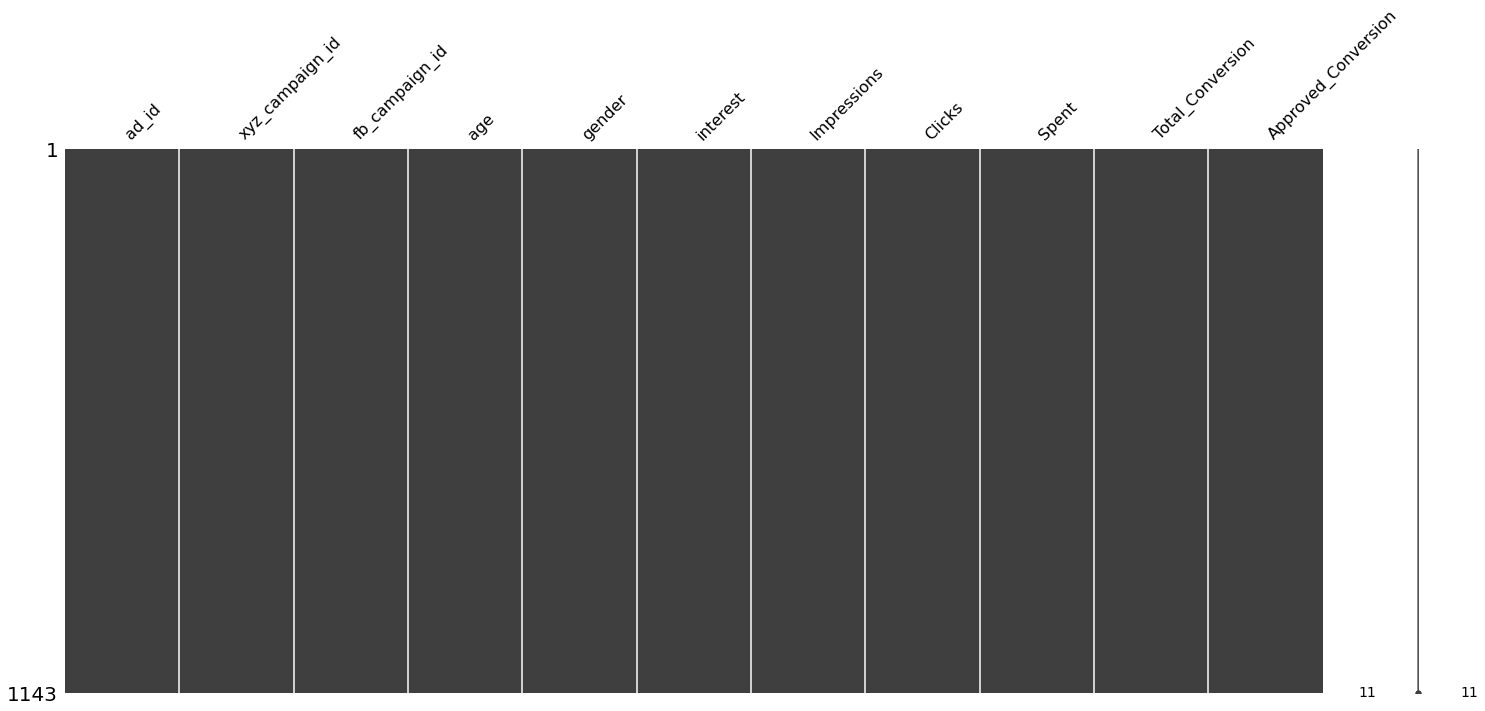

In [21]:
missingno.matrix(df)

####Outliers 

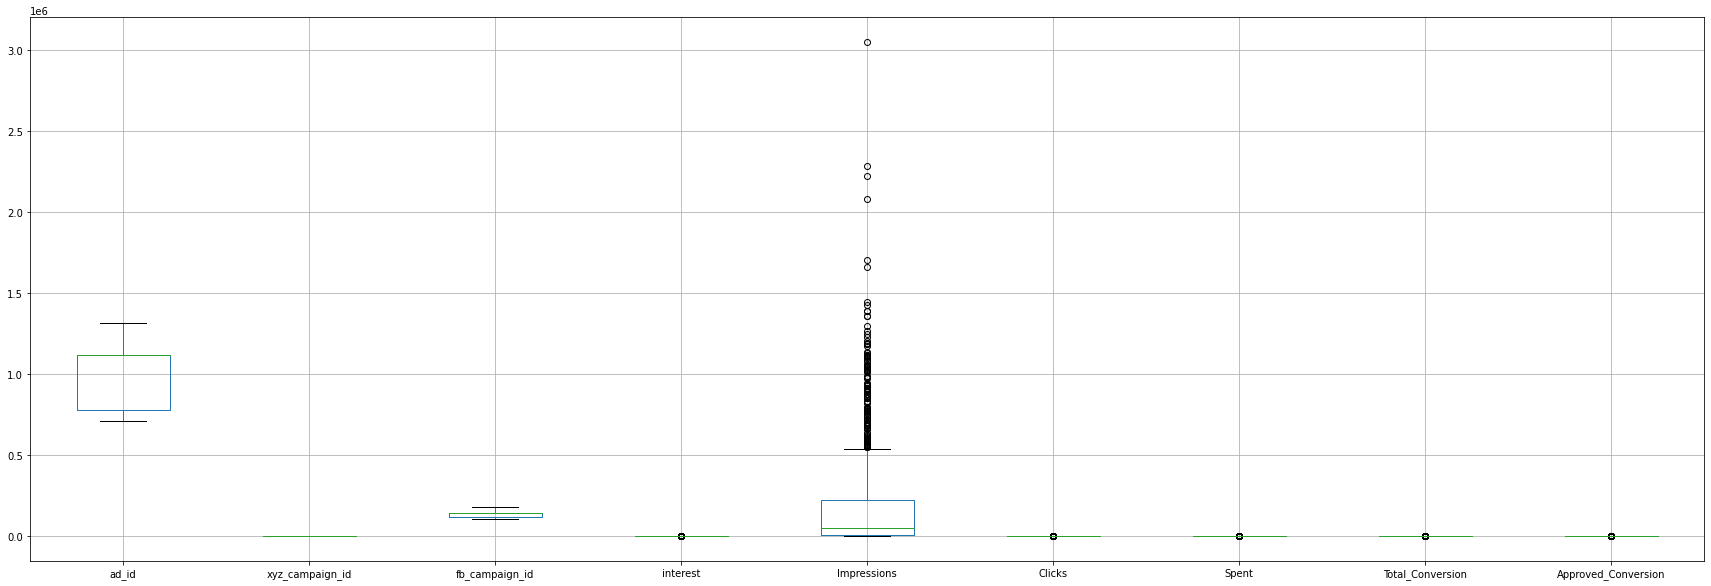

In [22]:
plt.figure(figsize = (30,10))
df.boxplot()
plt.show()

####Duplicação


In [57]:
df[df.duplicated()]

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras


####Matrix Correlação

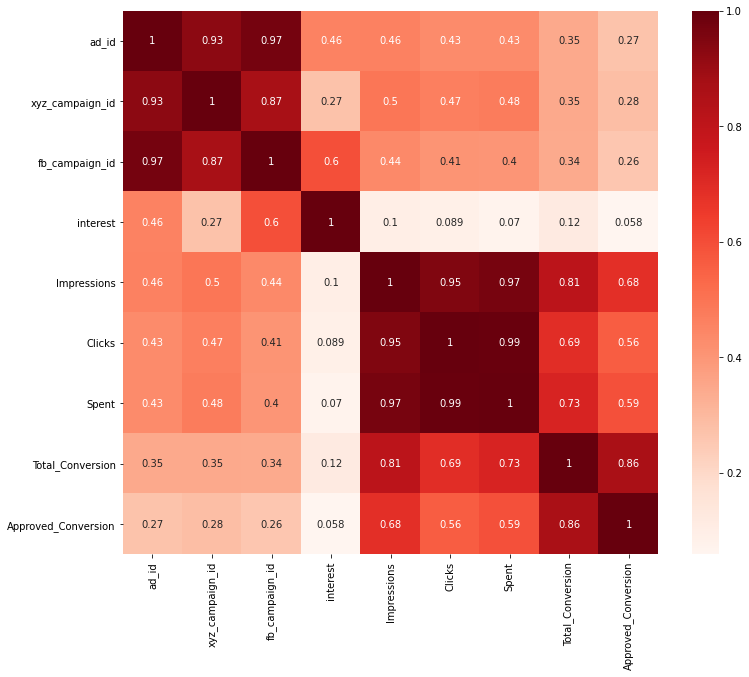

In [47]:
plt.figure(figsize = (12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

####Avaliando as Features


id_campanha - ID associaddo a cada campanha publicitária da empresa XYZ



In [54]:
df["id_campanha"].nunique()

3

In [55]:
df["id_campanha"].unique()

array([ 916,  936, 1178])

In [59]:
df["id_campanha"].replace({916:"campanha_1", 936: "campanha_2", 1178: "campanha_3"}, inplace=True)

In [62]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


In [63]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,45-49,F,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,45-49,F,114,513161,114,165.609999,5,2


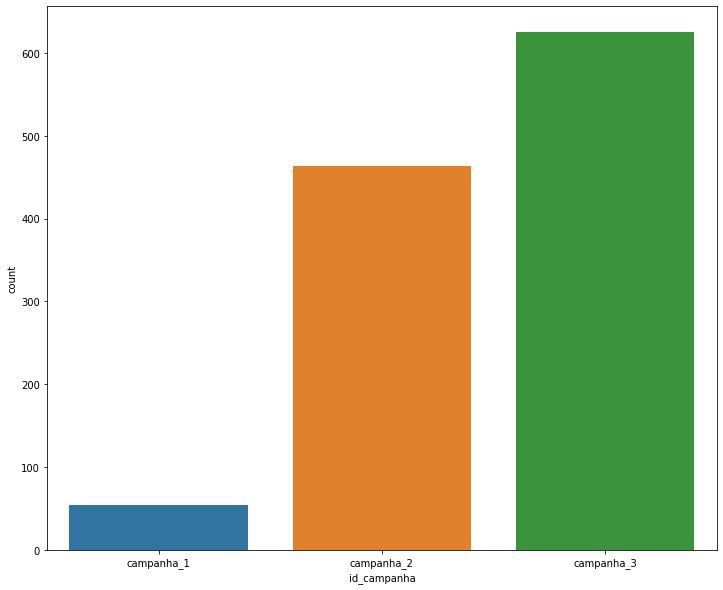

In [64]:
plt.figure(figsize=(12,10))
sns.countplot(x="id_campanha", data=df)
plt.show()

campanha_3 tem maior número de anúncios

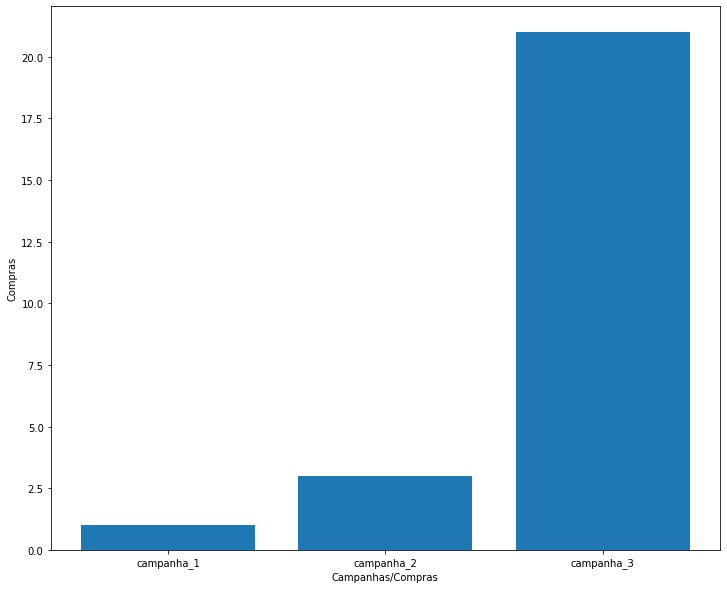

In [66]:
plt.figure(figsize=(12,10))
plt.bar(df["id_campanha"], df["compras"])
plt.ylabel("Compras")
plt.xlabel("Campanhas/Compras")
plt.show()

idade - idade da pessoa a quem o anúncio é mostrado.

In [67]:
df["idade"].nunique()


4

In [68]:
df["idade"].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

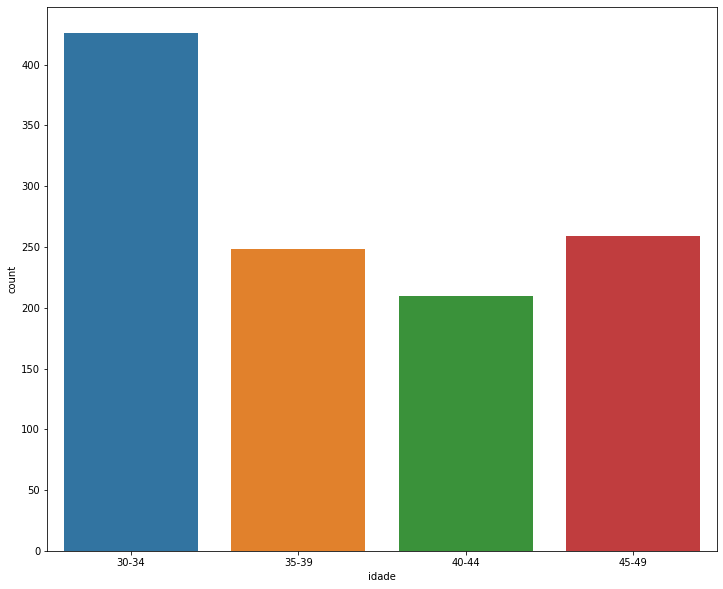

In [71]:
plt.figure(figsize=(12,10))
sns.countplot(x = "idade", data=df)
plt.show()

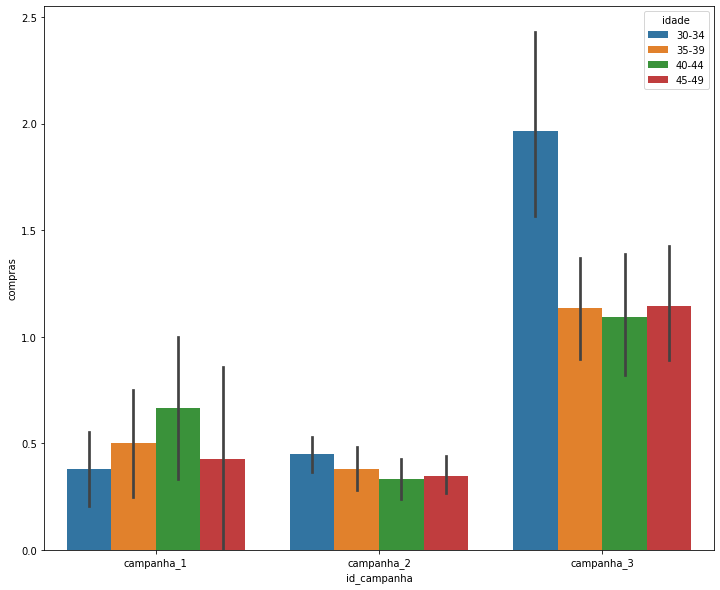

In [73]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["idade"], data=tips)
plt.show()

genero-sexo da pessoa que deseja que o anúncioseja mostrado

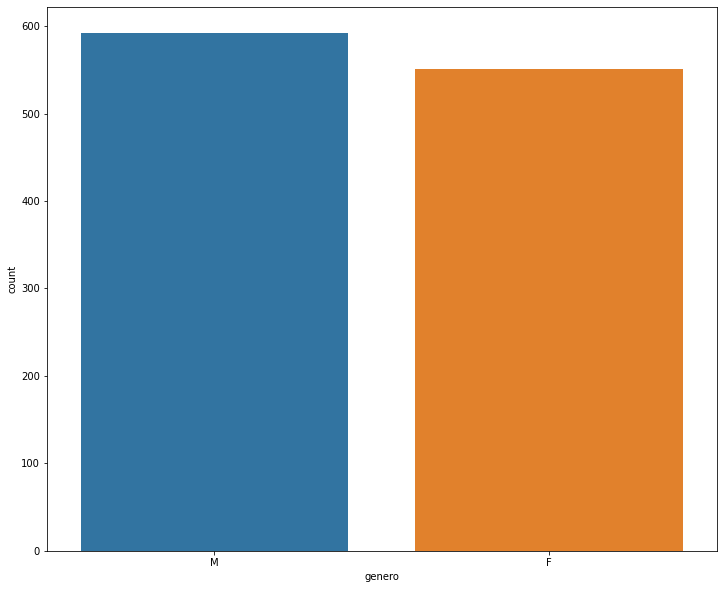

In [82]:
plt.figure(figsize=(12,10))
sns.countplot(x= "genero", data=df)
plt.show()

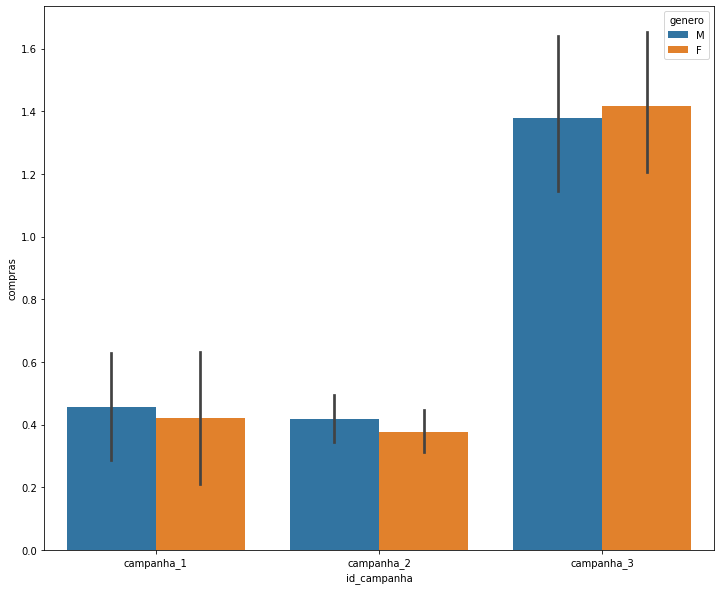

In [83]:
plt.figure(figsize=(12,10))
tips = sns.load_dataset("tips")
sns.barplot(x=df["id_campanha"], y=df["compras"], hue=df["genero"], data=tips)
plt.show()

#Etapa 4: Modelagem/Machine Learnig

In [74]:
df.shape

(1143, 11)

In [75]:
amostra_df = df.sample(n=20)

In [76]:
amostra_df.shape

(20, 11)

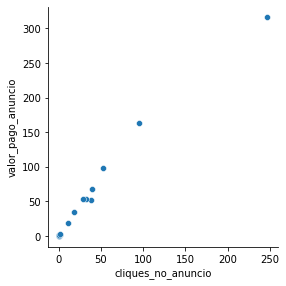

In [84]:
sns.pairplot(amostra_df, x_vars=["cliques_no_anuncio"], y_vars=["valor_pago_anuncio"], height=4, kind="scatter")
plt.show()

In [81]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,30-34,M,28,4133,1,1.29,1,1


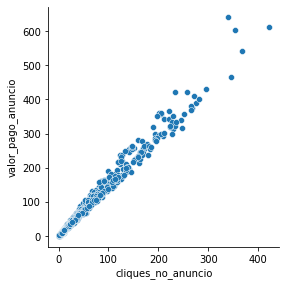

In [85]:
sns.pairplot(df, x_vars=["cliques_no_anuncio"], y_vars=["valor_pago_anuncio"], height=4, kind="scatter")
plt.show()

In [131]:
df = df.replace('30-34',0.0011)
df = df.replace('35-39',0.0012)
df = df.replace('40-44',0.0013)
df = df.replace('45-49',0.0014)

In [88]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,M,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,M,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,M,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,M,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,M,28,4133,1,1.29,1,1


In [89]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,0.0014,F,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,0.0014,F,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,0.0014,F,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,0.0014,F,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,0.0014,F,114,513161,114,165.609999,5,2


In [130]:
df = df.replace('M',1)
df = df.replace('F',0)

In [91]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [129]:
X = df[['idade', 'genero', 'interesse', 'numero_exibicoes', 'cliques_no_anuncio']]

In [128]:
y = df['valor_pago_anuncio']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [97]:
X_train.shape

(800, 5)

In [98]:
X_train.head()

,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio
640,0.0012,1,21,271091,42
852,0.0011,0,24,185665,39
311,0.0013,1,29,10090,2
803,0.0014,1,29,563074,86
105,0.0014,0,10,73634,23


In [99]:
y_train.head()

640     78.040000
852     62.140001
311      2.650000
803    142.709999
105     32.980000
Name: valor_pago_anuncio, dtype: float64

In [126]:
model = LinearRegression()

In [102]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
model.coef_

array([ 1.11543951e+04,  2.54714226e+00, -6.87113770e-02,  8.85162529e-05,
        1.06012421e+00])

In [105]:
model.intercept_

-13.191111867749427

In [106]:
model.rank_

5

In [125]:
#y = ax + b

In [111]:
model.score(X_test, y_test) 

0.994899077013531

#Predição para campanhas no facebook

In [112]:
df.head()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
0,708746,campanha_1,103916,0.0011,1,15,7350,1,1.43,2,1
1,708749,campanha_1,103917,0.0011,1,16,17861,2,1.82,2,0
2,708771,campanha_1,103920,0.0011,1,20,693,0,0.00,1,0
3,708815,campanha_1,103928,0.0011,1,28,4259,1,1.25,1,0
4,708818,campanha_1,103928,0.0011,1,28,4133,1,1.29,1,1


In [122]:
df.tail()

,id_anuncio,id_campanha,id_fb_campanha,idade,genero,interesse,numero_exibicoes,cliques_no_anuncio,valor_pago_anuncio,conversao,compras
1138,1314410,campanha_3,179977,0.0014,0,109,1129773,252,358.189997,13,2
1139,1314411,campanha_3,179978,0.0014,0,110,637549,120,173.880003,3,0
1140,1314412,campanha_3,179979,0.0014,0,111,151531,28,40.289999,2,0
1141,1314414,campanha_3,179981,0.0014,0,113,790253,135,198.710000,8,2
1142,1314415,campanha_3,179982,0.0014,0,114,513161,114,165.609999,5,2


In [116]:
idade = float(input("Idade: "))
genero = int(input("Genero: "))
interesse = int(input("Interesse: "))
numero_exibicoes = int(input("Exibições: "))
cloques_no_anuncio = float(input("Cloques: "))

Idade: 0.0011
Genero: 1
Interesse: 28
Exibições: 8000
Cloques: 1


In [115]:
idade

0.0011

In [117]:
genero

1

In [124]:
pred = model.predict([[idade, genero, interesse, numero_exibicoes, cloques_no_anuncio]])

In [123]:
print(pred)

[1.47020066]
